In [33]:
import pandas as pd
from scipy.stats import levene
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Load CSV
df = pd.read_csv("per_sample_results/kc_house_data_tasks_15_k_10_mode_0.csv")  # hoặc dùng StringIO nếu bạn đọc từ chuỗi

# Lọc dữ liệu thuộc tập train
df_train = df[df["split"] == "train"]
df_test = df[df["split"] == "test"]



In [16]:
df_test['method'].value_counts()

method
pooling          2303
random_forest    2303
lightGBM         2303
polynomial 2     2303
shat             2303
sgreedy          2303
mean             2303
shat-poly        2303
Pooling_GAM      2303
shat-gam         2303
Name: count, dtype: int64

/tmp/ipykernel_263738/853705277.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mse = grouped.apply(lambda g: np.mean((g['residual'])**2))


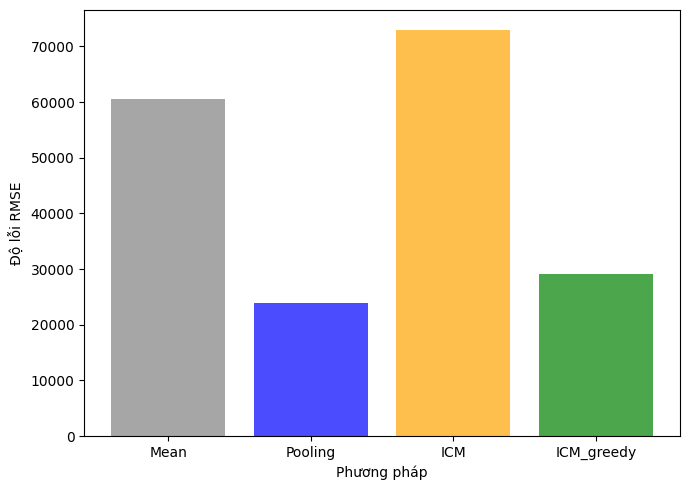

In [36]:
df = pd.read_csv("per_sample_results/kc_house_data_tasks_15_k_10_mode_0.csv")  # hoặc dùng StringIO nếu bạn đọc từ chuỗi

# Lọc dữ liệu thuộc tập train
df_train = df[df["split"] == "train"]
df_test = df[df["split"] == "test"]

df_test = df_test[df_test['method'].isin(['mean', 'pooling', 'shat', 'sgreedy'])]

# Tên phương pháp hiển thị
method_names = ["Mean", "Pooling", "ICM", "ICM_greedy"]

# Nhóm theo phương pháp
grouped = df_test.groupby('method')

# Tính MSE
mse = grouped.apply(lambda g: np.mean((g['residual'])**2))

# Đảm bảo đúng thứ tự để map method_names chính xác
mse = mse.reindex(['mean', 'pooling', 'shat', 'sgreedy'])

# Tạo biểu đồ MSE
plt.figure(figsize=(7, 5))
bars = plt.bar(method_names, mse.values, color=["gray", "blue", "orange", "green"], alpha=0.7)

# plt.title("Độ lỗi MSE của các phương pháp trên tập kiểm tra")
plt.ylabel("Độ lỗi RMSE")
plt.xlabel("Phương pháp")
plt.xticks(rotation=0)  # Cho các label nằm ngang
plt.tight_layout()
plt.show()


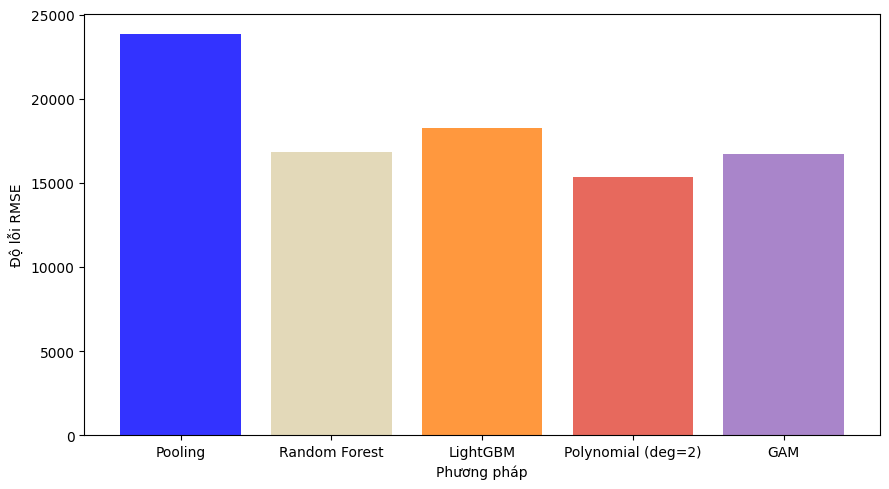

In [35]:
df = pd.read_csv("per_sample_results/kc_house_data_tasks_15_k_10_mode_0.csv")  # hoặc dùng StringIO nếu bạn đọc từ chuỗi

# Lọc dữ liệu thuộc tập train
df_train = df[df["split"] == "train"]
df_test = df[df["split"] == "test"]

df_test = df_test[df_test['method'].isin(['pooling', 'random_forest', 'lightGBM', 'polynomial 2', 'Pooling_GAM'])]

# Tên phương pháp hiển thị tương ứng
method_display_names = {
    'pooling': 'Pooling',
    'random_forest': 'Random Forest',
    'lightGBM': 'LightGBM',
    'polynomial 2': 'Polynomial (deg=2)',
    'Pooling_GAM': 'GAM'
}

# Nhóm theo phương pháp
grouped = df_test.groupby('method')

# Tính MSE
mse = grouped['residual'].apply(lambda g: np.mean(g**2))

# Sắp xếp đúng thứ tự mong muốn
method_order = ['pooling', 'random_forest', 'lightGBM', 'polynomial 2', 'Pooling_GAM']
mse = mse.reindex(method_order)

# Lấy tên hiển thị
labels = [method_display_names[m] for m in method_order]

# Tạo biểu đồ MSE
plt.figure(figsize=(9, 5))
bars = plt.bar(labels, mse.values, color=["blue", "#DCD0A8", "#ff7f0e", "#E14434", "#9467bd"], alpha=0.8)

# plt.title("Độ lỗi MSE của các phương pháp trên tập kiểm tra")
plt.ylabel("Độ lỗi RMSE")
plt.xlabel("Phương pháp")
# plt.xticks(rotation=15, ha='right')  # Gập nhẹ tên phương pháp
plt.tight_layout()
plt.show()


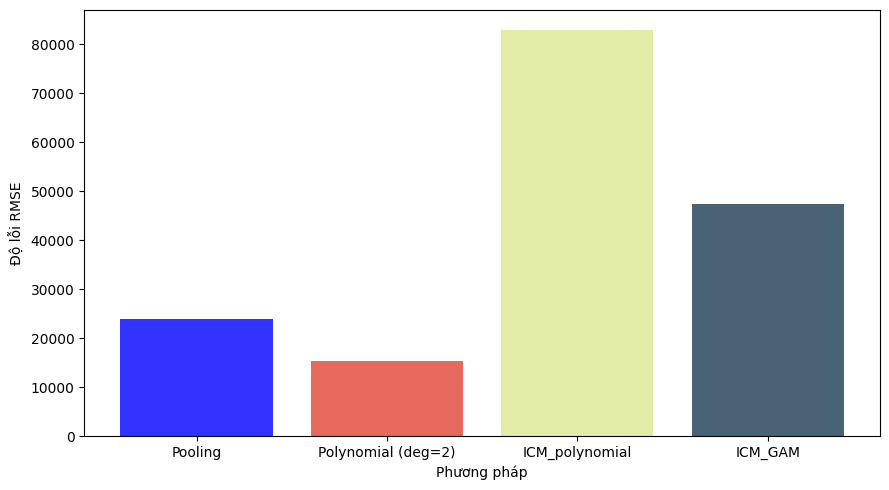

In [34]:
df = pd.read_csv("per_sample_results/kc_house_data_tasks_15_k_10_mode_0.csv")  # hoặc dùng StringIO nếu bạn đọc từ chuỗi

# Lọc dữ liệu thuộc tập train
df_train = df[df["split"] == "train"]
df_test = df[df["split"] == "test"]

df_test = df_test[df_test['method'].isin(['pooling','polynomial 2', 'shat-poly', 'shat-gam'])]

# Tên phương pháp hiển thị tương ứng
method_display_names = {
    'pooling': 'Pooling',
    'polynomial 2': 'Polynomial (deg=2)',
    'shat-poly': 'ICM_polynomial',
    'shat-gam': 'ICM_GAM',
}

# Nhóm theo phương pháp
grouped = df_test.groupby('method')

# Tính MSE
mse = grouped['residual'].apply(lambda g: np.mean(g**2))

# Sắp xếp đúng thứ tự mong muốn
method_order = ['pooling','polynomial 2', 'shat-poly', 'shat-gam']
mse = mse.reindex(method_order)

# Lấy tên hiển thị
labels = [method_display_names[m] for m in method_order]

# Tạo biểu đồ MSE
plt.figure(figsize=(9, 5))
bars = plt.bar(labels, mse.values, color=["blue",  "#E14434", "#DEE791", "#1B3C53"], alpha=0.8)

# plt.title("Độ lỗi MSE của các phương pháp trên tập kiểm tra")
plt.ylabel("Độ lỗi RMSE")
plt.xlabel("Phương pháp")
# plt.xticks(rotation=15, ha='right')  # Gập nhẹ tên phương pháp
plt.tight_layout()
plt.show()


/tmp/ipykernel_263738/4294720748.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mse = grouped.apply(lambda g: np.mean((g['residual'])**2))


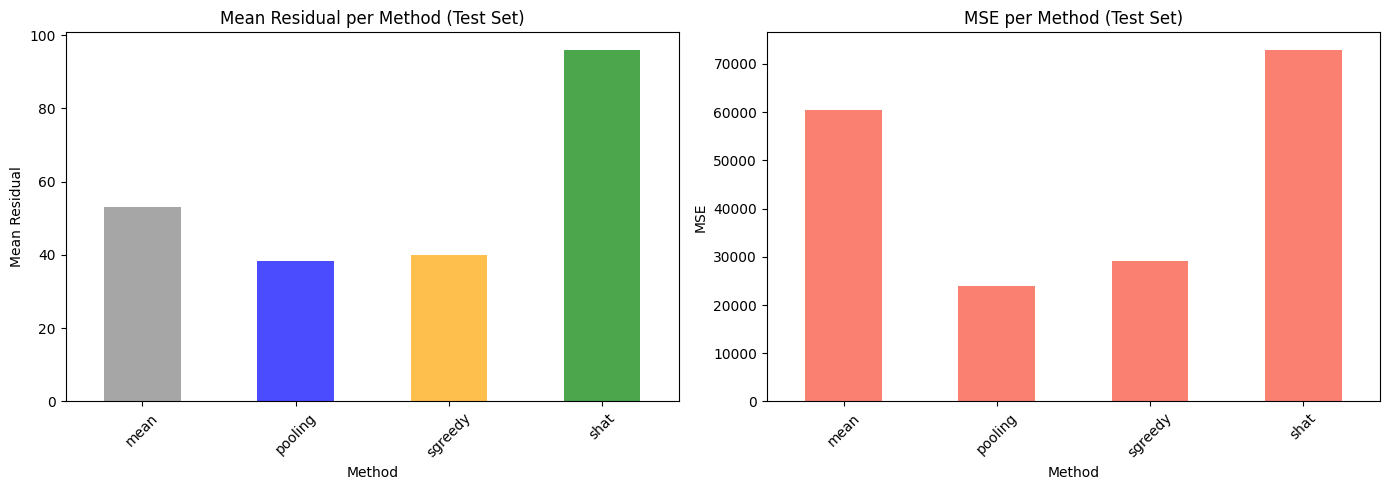

In [3]:
df_test = df_test[df_test['method'].isin(['mean', 'pooling', 'shat', 'sgreedy'])]

# Nhóm theo phương pháp
grouped = df_test.groupby('method')

# Tính toán chỉ số
mean_residual = grouped['residual'].mean()
mse = grouped.apply(lambda g: np.mean((g['residual'])**2))

# Tạo subplots nằm ngang
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), sharey=False)

# Plot mean residual
mean_residual.plot(kind='bar', ax=axes[0], color=["gray", "blue", "orange", "green"], alpha = 0.7)
axes[0].set_title("Mean Residual per Method (Test Set)")
axes[0].set_ylabel("Mean Residual")
axes[0].set_xlabel("Method")
axes[0].tick_params(axis='x', rotation=45)

# Plot MSE
mse.plot(kind='bar', ax=axes[1], color=["gray", "blue", "orange", "green"], alpha = 0.7 )
axes[1].set_title("MSE per Method (Test Set)")
axes[1].set_ylabel("MSE")
axes[1].set_xlabel("Method")
axes[1].tick_params(axis='x', rotation=45)

# Tối ưu bố cục
plt.tight_layout()
plt.show()

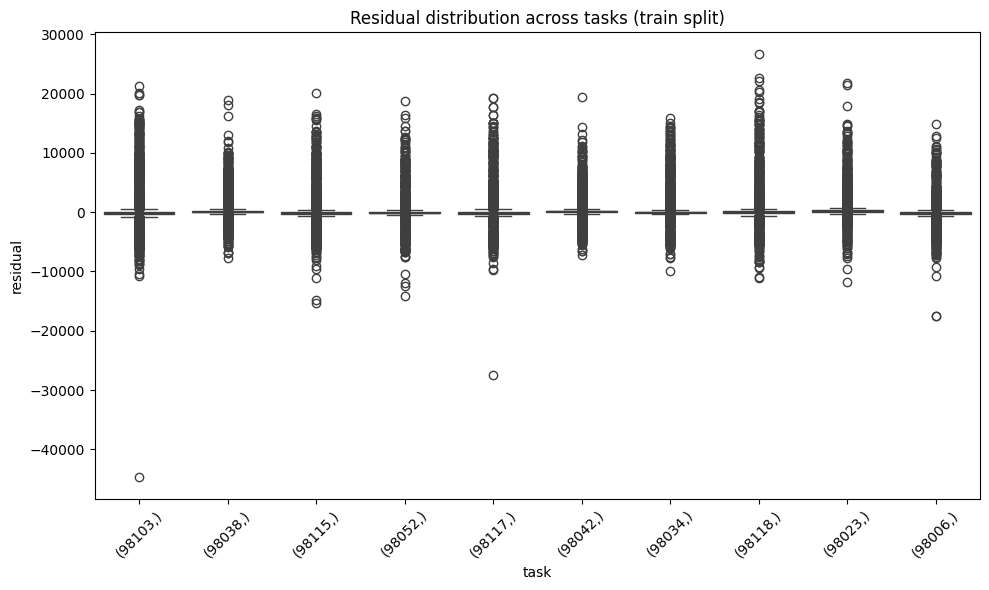

In [2]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x="task", y="residual")
plt.title("Residual distribution across tasks (train split)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
from scipy.stats import f_oneway
f_stat, p = f_oneway(*grouped_residuals)

print(p)

0.0
